In [91]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
#%matplotlib inline
import plotly.express as px

from sklearn.metrics import mean_squared_error

In [92]:
df = pd.read_csv("energy consumption.csv")
df.shape

(969, 2)

In [93]:
df.head()

,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133


In [94]:
df.dtypes

DATE             object
ENERGY_INDEX    float64
dtype: object

In [95]:
df['DATE'] = pd.to_datetime(df['DATE'],format='%m/%Y')

#df.index = df['DATE']

df.shape

(969, 2)

In [96]:
df.head()

,DATE,ENERGY_INDEX
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


# Exploring the Data

In [97]:
df.shape

(969, 2)

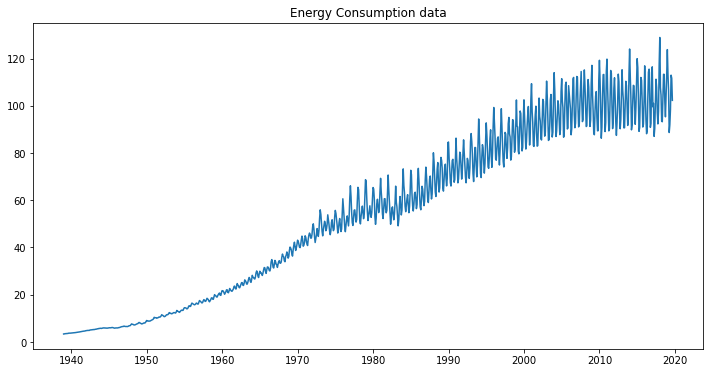

In [98]:
plt.figure(figsize=(12,6))

plt.plot(df.DATE, df['ENERGY_INDEX'])

plt.title("Energy Consumption data")
plt.show()

### Check for Missing Values

In [99]:
df.shape

(969, 2)

In [100]:
df.head()

,DATE,ENERGY_INDEX
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [101]:
df['DATE'].min(), df['DATE'].max()

(Timestamp('1939-01-01 00:00:00'), Timestamp('2019-09-01 00:00:00'))

In [102]:
df['DATE'].max() - df['DATE'].min()

Timedelta('29463 days 00:00:00')

In [103]:
# In months 
((df['DATE'].max() -df['DATE'].min())/np.timedelta64(1, 'M'))

968.0034497628288

- No missing values in the data

- We have the monthly level data. Let us find out if there is any pattern in the data. 
    - Is the consumption higher/ lower on particular month of the year?
    - How is the count changing over the years? Is it increasing or decreasing or constant?

# Adding features to the data

In [104]:
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Quarter'] = df['DATE'].dt.quarter
df.head()

,DATE,ENERGY_INDEX,Year,Month,Quarter
0,1939-01-01,3.3842,1939,1,1
1,1939-02-01,3.4100,1939,2,1
2,1939-03-01,3.4875,1939,3,1
3,1939-04-01,3.5133,1939,4,2
4,1939-05-01,3.5133,1939,5,2


In [105]:
# boxplot for year  

fig = px.box(df, x='Year', y='ENERGY_INDEX',color='Year')
fig.update_traces(showlegend=False)
fig.show() 

**Observations**
- Till  year 2005 ( hover in the graph and it will show ) the trend has been increasing consumption.
- After year 2005,the consumption is incraesing/decreasing randomly.

In [106]:
# boxplot for month's count

fig = px.box(df, x='Month', y='ENERGY_INDEX',color='Month')
fig.update_traces(showlegend=False)
fig.show() 

**Observations**
- The first and the last months have observed a significantly higher average consumption.
- It keeps on decreasing from Jan till May, then again startes incrasing with slight dip in sept and Oct.

In [107]:
fig = px.box(df, x='Quarter', y='ENERGY_INDEX',color='Quarter')
#fig.update_traces(showlegend=False)
fig.show() 

**Observations**
- Quarter 1 has peak consumption.
- Quarter 2 has the minimum  consumption.

In [108]:
df.groupby('Quarter')['ENERGY_INDEX'].mean()

Quarter
1    58.127037
2    50.794960
3    56.527812
4    53.162160
Name: ENERGY_INDEX, dtype: float64

In [109]:
df_t = df.groupby(['Year','Month'],as_index=False)['ENERGY_INDEX'].mean()
df_t.head()

,Year,Month,ENERGY_INDEX
0,1939,1,3.3842
1,1939,2,3.4100
2,1939,3,3.4875
3,1939,4,3.5133
4,1939,5,3.5133


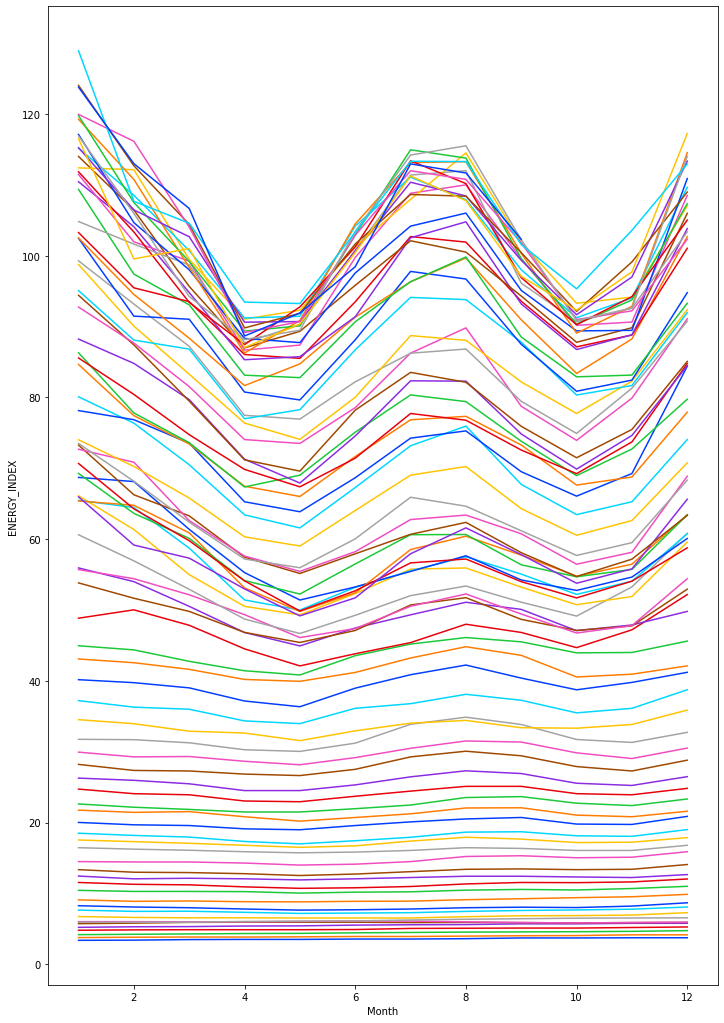

In [110]:
plt.figure(figsize=(12,18))
sns.lineplot(data=df_t, x='Month', y='ENERGY_INDEX', hue='Year',palette="bright",legend= False);

**Observations**

Recent years shows a monthly pattern.

# Decompose

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [112]:
# Decompose needs a date index 
df.index = df['DATE']
df.head()

,DATE,ENERGY_INDEX,Year,Month,Quarter
DATE,,,,,
1939-01-01,1939-01-01,3.3842,1939,1,1
1939-02-01,1939-02-01,3.4100,1939,2,1
1939-03-01,1939-03-01,3.4875,1939,3,1
1939-04-01,1939-04-01,3.5133,1939,4,2
1939-05-01,1939-05-01,3.5133,1939,5,2


In [113]:
decomposed_series = seasonal_decompose(df['ENERGY_INDEX'])

In [114]:
decomposed_series

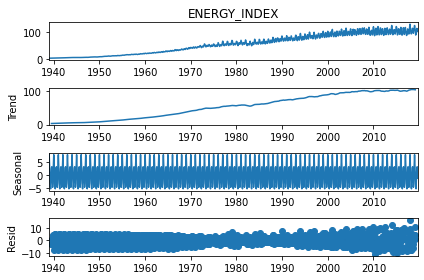

In [115]:
decomposed_series.plot()
plt.show()

<AxesSubplot:xlabel='DATE'>

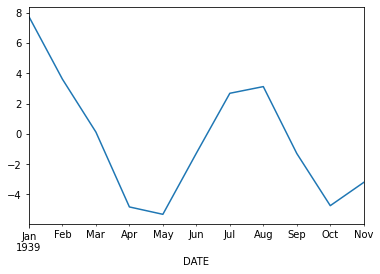

In [116]:
(decomposed_series.seasonal[0:11]).plot() # one year data 

<AxesSubplot:xlabel='DATE'>

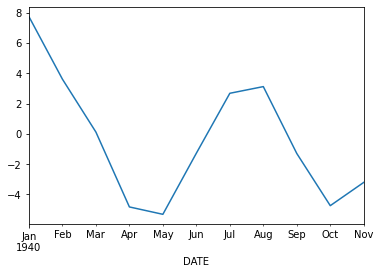

In [117]:
(decomposed_series.seasonal[12:23]).plot() # one year data 

# Train and validation set , validation  is last 3 years data 

In [118]:
df_1 = pd.read_csv("energy consumption.csv")
df_1['DATE'] = pd.to_datetime(df_1['DATE'],format='%m/%Y')
#df_1.index = df_1['DATE']

In [119]:
df_train = df_1[~df_1['DATE'].dt.year.isin([2017,2018,2019])].copy()
df_val = df_1[df_1['DATE'].dt.year.isin([2017,2018,2019])].copy()
df_val.reset_index(inplace = True)
df_train.shape,df_val.shape

((936, 2), (33, 3))

In [120]:
df_train.shape[0] + df_val.shape[0],df.shape[0]

(969, 969)

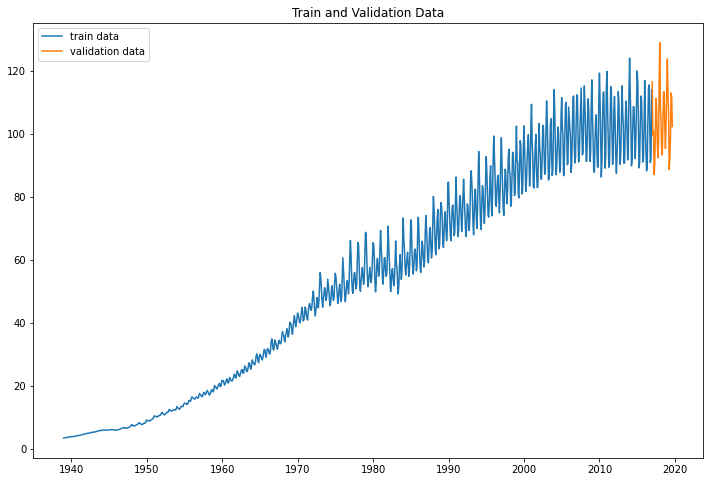

In [121]:
plt.figure(figsize=(12,8))

plt.plot(df_train['DATE'], df_train['ENERGY_INDEX'], label='train data')
plt.plot(df_val['DATE'],df_val['ENERGY_INDEX'], label='validation data')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Moving Average

In [122]:
df_train.head()

,DATE,ENERGY_INDEX
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [123]:
df_train.tail(12)

,DATE,ENERGY_INDEX
924,2016-01-01,116.8926
925,2016-02-01,105.9614
926,2016-03-01,94.2339
927,2016-04-01,88.1615
928,2016-05-01,89.4711
929,2016-06-01,103.4258
930,2016-07-01,114.1946
931,2016-08-01,115.5015
932,2016-09-01,102.2398
933,2016-10-01,90.8499


In [124]:
# list holding last 12 values
month_vals = df_train.tail(12)['ENERGY_INDEX'].values
month_vals

array([116.8926, 105.9614,  94.2339,  88.1615,  89.4711, 103.4258,
       114.1946, 115.5015, 102.2398,  90.8499,  92.6032, 114.0219])

In [125]:
len(df_val)

33

In [126]:
df_val['moving_average'] = np.NAN
df_val.head()

,index,DATE,ENERGY_INDEX,moving_average
0,936,2017-01-01,116.4746,NaN
1,937,2017-02-01,99.5393,NaN
2,938,2017-03-01,101.0063,NaN
3,939,2017-04-01,87.0374,NaN
4,940,2017-05-01,90.3591,NaN


In [127]:
for i in range(0,len(df_val)):
    end = len(month_vals)
    start = len(month_vals)-12
    pred = np.mean(month_vals[start:end])
    
    #df_val['moving_average'][i] = pred
    df_val.loc[i,'moving_average'] = pred
    month_vals = np.append(month_vals,pred)
    #print(month_vals)

In [128]:
df_val.head()

,index,DATE,ENERGY_INDEX,moving_average
0,936,2017-01-01,116.4746,102.296433
1,937,2017-02-01,99.5393,101.080086
2,938,2017-03-01,101.0063,100.673310
3,939,2017-04-01,87.0374,101.209927
4,940,2017-05-01,90.3591,102.297296


In [129]:
df_val.tail()

,index,DATE,ENERGY_INDEX,moving_average
28,964,2019-05-01,91.9046,102.203018
29,965,2019-06-01,98.4397,102.194325
30,966,2019-07-01,112.9469,102.184838
31,967,2019-08-01,111.6645,102.181908
32,968,2019-09-01,102.2911,102.186658


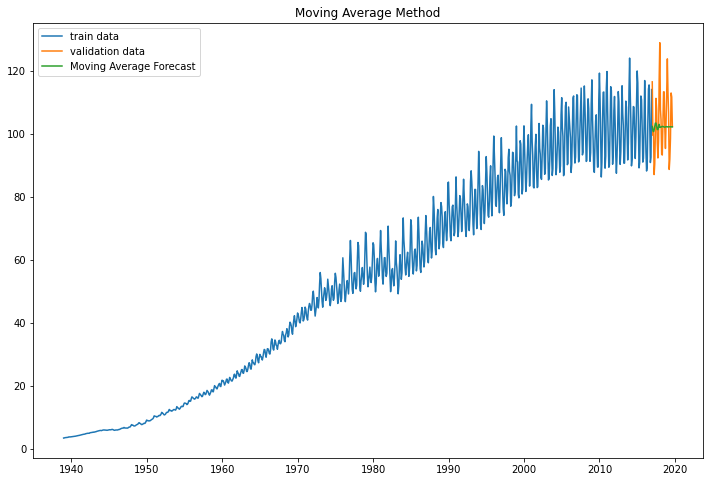

In [130]:
plt.figure(figsize=(12,8))

plt.plot(df_train['DATE'], df_train['ENERGY_INDEX'], label='train data')
plt.plot(df_val['DATE'],df_val['ENERGY_INDEX'], label='validation data')
plt.plot(df_val['DATE'],df_val['moving_average'], label='Moving Average Forecast')

plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

In [131]:
# calculating RMSE 
rmse = mean_squared_error(df_val['ENERGY_INDEX'], df_val['moving_average'],squared=False)
print('The RMSE value for Moving Approach is', rmse)

The RMSE value for Moving Approach is 10.167415099901133


# Weighted Moving Average

In [132]:
# list holding last 12 values
month_vals = df_train.tail(12)['ENERGY_INDEX'].values.tolist()

weights = []
for i in range(1,13):
    W = i/13
    weights.append(W)
weights

[0.07692307692307693,
 0.15384615384615385,
 0.23076923076923078,
 0.3076923076923077,
 0.38461538461538464,
 0.46153846153846156,
 0.5384615384615384,
 0.6153846153846154,
 0.6923076923076923,
 0.7692307692307693,
 0.8461538461538461,
 0.9230769230769231]

In [133]:
sum(weights)

6.0

In [134]:
len(month_vals), len(weights)

(12, 12)

In [135]:
df_val['weighted_moving_average'] = np.NAN

In [136]:
for i in range(0,len(df_val)):
    
    end = len(month_vals)
    start = len(month_vals)-12
    
    final_values = month_vals[start:end]
    
    weighted_mean = 0
    for j, k in zip(weights,final_values):
        weighted_mean += j*k
        
    weighted_mean = weighted_mean/sum(weights)
        
    #df_val['weighted_moving_average'][i] = weighted_mean
    df_val.loc[i,'weighted_moving_average'] = pred
    month_vals.append(weighted_mean)

In [137]:
df_val.head()

,index,DATE,ENERGY_INDEX,moving_average,weighted_moving_average
0,936,2017-01-01,116.4746,102.296433,102.186658
1,937,2017-02-01,99.5393,101.080086,102.186658
2,938,2017-03-01,101.0063,100.673310,102.186658
3,939,2017-04-01,87.0374,101.209927,102.186658
4,940,2017-05-01,90.3591,102.297296,102.186658


In [138]:
df_val.tail()

,index,DATE,ENERGY_INDEX,moving_average,weighted_moving_average
28,964,2019-05-01,91.9046,102.203018,102.186658
29,965,2019-06-01,98.4397,102.194325,102.186658
30,966,2019-07-01,112.9469,102.184838,102.186658
31,967,2019-08-01,111.6645,102.181908,102.186658
32,968,2019-09-01,102.2911,102.186658,102.186658


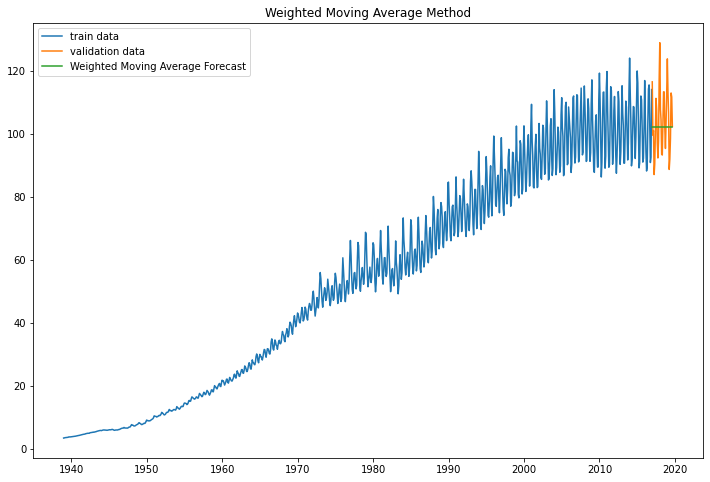

In [139]:
plt.figure(figsize=(12,8))

plt.plot(df_train['DATE'], df_train['ENERGY_INDEX'], label='train data')
plt.plot(df_val['DATE'],df_val['ENERGY_INDEX'], label='validation data')
plt.plot(df_val['DATE'],df_val['weighted_moving_average'], label='Weighted Moving Average Forecast')

plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [140]:
# calculating RMSE 
rmse = mean_squared_error(df_val['ENERGY_INDEX'], df_val['weighted_moving_average'],squared=False)
print('The RMSE value for Weighted Moving Approach is', rmse)

The RMSE value for Weighted Moving Approach is 10.296189341511043


# Exponential Smoothing

In [141]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [142]:
model = SimpleExpSmoothing(np.asarray(df_train['ENERGY_INDEX']))
model = model.fit(smoothing_level=0.7,initial_level=3,optimized=False) 

fcast = model.forecast(len(df_val)) 

c:\program files\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

c:\program files\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1099: FutureWarning:

Setting initial values during fit is deprecated and will be removed after 0.13. These should be set during model initialization.



In [143]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [144]:
# calculating RMSE - forecats method 1
mean_squared_error(df_val['ENERGY_INDEX'], fcast,squared=False)

10.732194754698778

In [145]:
model = SimpleExpSmoothing(np.asarray(df_train['ENERGY_INDEX']), initialization_method="estimated")
fit = model.fit()
fcast = fit.forecast(len(df_val))
model.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3.3840845178644625,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [146]:
# calculating RMSE - forecats method 1
mean_squared_error(df_val['ENERGY_INDEX'], fcast,squared=False)

14.084671580413943

In [147]:
model = SimpleExpSmoothing(np.asarray(df_train['ENERGY_INDEX']), initialization_method="heuristic")
fit = model.fit(smoothing_level=0.2,optimized=False)
fcast = fit.forecast(len(df_val))
model.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3.347999999999998,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [148]:
# calculating RMSE - forecats method 1
mean_squared_error(df_val['ENERGY_INDEX'], fcast,squared=False)

10.239160832604385

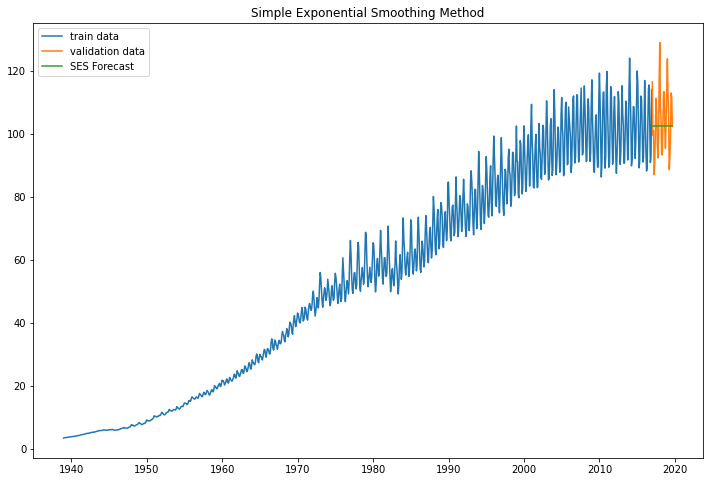

In [149]:
plt.figure(figsize=(12,8))

plt.plot(df_train['DATE'], df_train['ENERGY_INDEX'], label='train data')
plt.plot(df_val['DATE'],df_val['ENERGY_INDEX'], label='validation data')
plt.plot(df_val['DATE'],fcast, label='SES Forecast')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

# Double Exponential Smoothing

In [150]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [151]:
model = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']), trend='add')
model = model.fit(smoothing_level=0.7, smoothing_slope=0.0001, initial_slope = 1.2)  
fcast = model.forecast(len(df_val))
# calculating RMSE  - forecast method 2
mean_squared_error(df_val['ENERGY_INDEX'], fcast,squared=False)

c:\program files\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

<ipython-input-151-8e4c25b7a15e>:2: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead

c:\program files\python38\lib\site-packages\pandas\util\_decorators.py:199: FutureWarning:

the 'initial_slope'' keyword is deprecated, use 'initial_trend' instead

c:\program files\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1099: FutureWarning:

Setting initial values during fit is deprecated and will be removed after 0.13. These should be set during model initialization.



26.636093287293637

In [152]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1.8576368644908237,
 'initial_trend': 1.2,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [153]:
model = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']), initialization_method="estimated")
fit = model.fit()
fcast = fit.forecast(len(df_val))
# calculating RMSE  - forecast method 2
mean_squared_error(df_val['ENERGY_INDEX'], fcast,squared=False)

14.084671580413943

In [154]:
model.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3.3840845178644625,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [155]:
model = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']), trend='add')
fit = model.fit()
fcast = fit.forecast(len(df_val))
# calculating RMSE  - forecast method 2
mean_squared_error(df_val['ENERGY_INDEX'], fcast,squared=False)

c:\program files\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



15.485904586828342

In [156]:
model.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3.1827977941808165,
 'initial_trend': 0.11665446490385306,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [157]:
model = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']), initialization_method="heuristic")
fit = model.fit()
fcast = fit.forecast(len(df_val))
# calculating RMSE  - forecast method 2
mean_squared_error(df_val['ENERGY_INDEX'], fcast,squared=False)

14.084671580413943

In [158]:
model.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3.3840845178644625,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

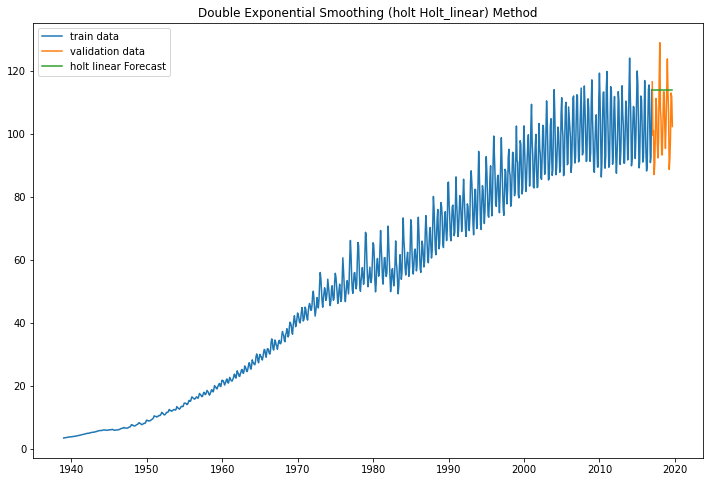

In [159]:
plt.figure(figsize=(12,8))

plt.plot(df_train['DATE'], df_train['ENERGY_INDEX'], label='train data')
plt.plot(df_val['DATE'],df_val['ENERGY_INDEX'], label='validation data')
plt.plot(df_val['DATE'],fcast, label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

# Holt's Winters (aka triple exponential smoothing)

In [160]:
from statsmodels.tsa.api import ExponentialSmoothing

In [161]:
model = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
fit = model.fit(smoothing_level=0.4, smoothing_trend=0.1, smoothing_seasonal=0.8) 

fcast = fit.forecast(len(df_val))
# calculating RMSE  - forecast method 2
mean_squared_error(df_val['ENERGY_INDEX'], fcast,squared=False)

c:\program files\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



7.62835428510507

In [162]:
model.params

{'smoothing_level': 0.4,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.8,
 'damping_trend': nan,
 'initial_level': 59.411353068285784,
 'initial_trend': 0.7873365687767836,
 'initial_seasons': array([0.05575494, 0.05415574, 0.05326009, 0.05198666, 0.05070115,
        0.05058664, 0.05025946, 0.05124966, 0.05360256, 0.05499764,
        0.05648542, 0.05697787]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

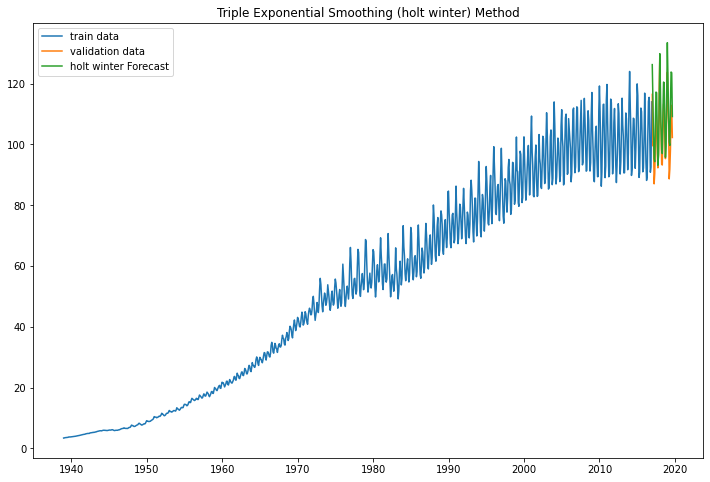

In [163]:
plt.figure(figsize=(12,8))

plt.plot(df_train['DATE'], df_train['ENERGY_INDEX'], label='train data')
plt.plot(df_val['DATE'],df_val['ENERGY_INDEX'], label='validation data')
plt.plot(df_val['DATE'],fcast, label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [164]:
fit1 = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']), seasonal_periods=12, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
# calculating RMSE 
mean_squared_error(df_val['ENERGY_INDEX'], fit1.forecast(len(df_val)),squared=False)

5.730589075109623

In [165]:
fit2 = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']), seasonal_periods=12, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
# calculating RMSE 
mean_squared_error(df_val['ENERGY_INDEX'], fit2.forecast(len(df_val)),squared=False)

5.738775408926326

In [166]:
fit3 = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']), seasonal_periods=12, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
# calculating RMSE 
mean_squared_error(df_val['ENERGY_INDEX'], fit3.forecast(len(df_val)),squared=False)

4.503056005258498

In [167]:
fit4 = ExponentialSmoothing(np.asarray(df_train['ENERGY_INDEX']), seasonal_periods=12, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
# calculating RMSE 
mean_squared_error(df_val['ENERGY_INDEX'], fit4.forecast(len(df_val)),squared=False)

4.484763522984724

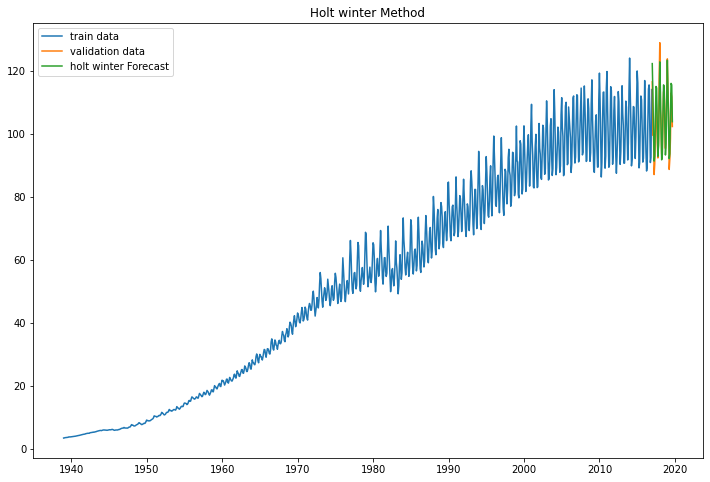

In [168]:
plt.figure(figsize=(12,8))

plt.plot(df_train['DATE'], df_train['ENERGY_INDEX'], label='train data')
plt.plot(df_val['DATE'],df_val['ENERGY_INDEX'], label='validation data')
plt.plot(df_val['DATE'],fit4.forecast(len(df_val)), label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Holt winter Method")
plt.show()

# Use ths model to  predict future values ..use all data

In [169]:
fit_final = ExponentialSmoothing(np.asarray(df['ENERGY_INDEX']), seasonal_periods=12, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
# forecast for 3 years
fcast_final = fit_final.forecast(36)

In [170]:
fcast_final

array([ 93.73388569,  98.57005255, 111.93033118, 121.51858059,
       107.74835578, 102.47826761,  88.79845102,  91.39667683,
       101.20762745, 113.78652994, 112.70739646, 101.45063943,
        93.96200983,  98.80923348, 112.20194138, 121.81286657,
       108.00675089, 102.72226408,  89.0074896 ,  91.61100572,
       101.44478639, 114.05305102, 112.96993896, 101.68475313,
        94.17702561,  99.03467007, 112.45794372, 122.09024111,
       108.25029478, 102.95223531,  89.20451026,  91.8130118 ,
       101.66830975, 114.30424825, 113.21738509, 101.9054032 ])

In [171]:
# Create df and plot

In [172]:
date_rng = pd.date_range(start='2019/10/01', periods=36, freq='MS')
date_rng

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [173]:
dict = {'DATE': date_rng, 'ENERGY_INDEX': fcast_final}
df_fcast = pd.DataFrame(data=dict)
df_fcast.head()

,DATE,ENERGY_INDEX
0,2019-10-01,93.733886
1,2019-11-01,98.570053
2,2019-12-01,111.930331
3,2020-01-01,121.518581
4,2020-02-01,107.748356


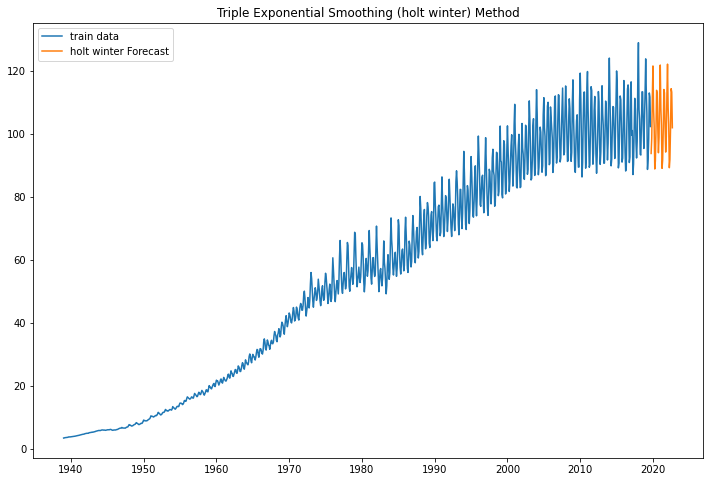

In [174]:
plt.figure(figsize=(12,8))

plt.plot(df['DATE'], df['ENERGY_INDEX'], label='train data')
plt.plot(df_fcast['DATE'],df_fcast['ENERGY_INDEX'], label='holt winter Forecast')

plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()